# Homework 1

## Question 1

### Q1.1

Import required packages.

In [16]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install sklearn
import numpy as np
import pickle
from sklearn import preprocessing

Create `myknn_regressor` class.

In [17]:
class myknn_regressor():
    
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """
        mean_type can be equal_weight or remove_outliers.
        equal_weight use the same weight for all neighbors.
        remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR].
        """
        if n_neighbors <= 0:
            print('Error: n_neighbors should be a positive integer')
            exit(1)
        elif mean_type not in ['equal_weight', 'remove_outliers']:
            print('Error: mean_type should be one of \'equal_weight\' or \'remove_outliers\'')
            exit(1)
        
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type if n_neighbors >= 10 else 'equal_weight'

    def fit(self, x_train, y_train):
        self.x_train = x_train.copy()
        self.y_train = y_train.copy()

    def predict(self, x_test):
        
        y_pred = []
        for x in x_test:
            dist = np.linalg.norm(x - self.x_train, axis=1)
            selected_idx = np.argsort(dist, kind='stable')[:self.n_neighbors]
            
            if self.mean_type == 'remove_outliers':
                # remove outliers
                q1 = np.quantile(self.y_train[selected_idx], .25)
                q3 = np.quantile(self.y_train[selected_idx], .75)
                iqr = q3 - q1
                def notOutlier(idx):
                    return ((self.y_train[idx] >= q1 - 1.5*iqr) and (self.y_train[idx] <= q3 + 1.5*iqr))
                selected_idx = list(filter(notOutlier, selected_idx))
                 
            pred = np.mean(self.y_train[selected_idx])
            y_pred.append(pred)
        
        return np.array(y_pred)
                

### Q1.2
Load and standardize data.

In [18]:
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
x_train = xscaler.transform(msd_data['X_train'])
x_test = xscaler.transform(msd_data['X_test'])
y_train = msd_data['Y_train']
y_test = msd_data['Y_test']

Fit the KNN regressor and predict.

In [19]:
myknn = myknn_regressor(20, 'equal_weight')
myknn.fit(x_train, y_train)
y_pred = myknn.predict(x_test)

Compute RMSE.

In [20]:
def rmse(ground_truth, prediction):
    mse = np.mean((ground_truth - prediction) ** 2)
    return np.sqrt(mse)
print(f'RMSE = {rmse(y_test, y_pred)}')

RMSE = 10.25126451549596


List the first 20 predictions.

In [21]:
np.set_printoptions(precision=2)
print(f'Predictions: {y_pred[:20]}')

Predictions: [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


### Q1.3

Data have been load and standardized in the previous section.

Fit the KNN model with type 'remove outlier' and predict.

In [22]:
myknn = myknn_regressor(20, 'remove_outliers')
myknn.fit(x_train, y_train)
y_pred = myknn.predict(x_test)

Compute RMSE.

In [23]:
print(f'RMSE = {rmse(y_test, y_pred)}')

RMSE = 10.212572466080376


List the first 20 predictions.

In [24]:
print(f'Predictions: {y_pred[:20]}')

Predictions: [1993.35 1993.8  2000.65 1992.74 1992.8  2000.   1988.1  1991.65 2002.25
 2003.95 2000.5  2000.94 1995.55 1997.2  1998.61 1997.4  1992.15 2003.83
 2003.2  1995.75]


## Question 2

[Setting 1] KNeighborsRegressor with standardization

In [25]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_settings = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

# data standardization
x_train, y_train = msd_data['X_train'], msd_data['Y_train']
x_test, y_test = msd_data['X_test'], msd_data['Y_test']
xscaler = preprocessing.StandardScaler().fit(x_train)
x_train_stdize = xscaler.transform(x_train)
x_test_stdize = xscaler.transform(x_test)

# compute rmse under different k
kneireg_stdize_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    kneireg = KNeighborsRegressor(n_neighbors=k)
    kneireg.fit(x_train_stdize, y_train)
    y_pred = kneireg.predict(x_test_stdize)
    kneireg_stdize_rmse.append(rmse(y_test, y_pred))
print(kneireg_stdize_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.425998912973919, 10.318171959828572, 10.25126451549596, 10.23762722509469, 10.215977156359507, 10.205243203546763, 10.204332770527754, 10.207243171822855, 10.206033712139762, 10.208862384446808, 10.21700262724764, 10.231954198429056, 10.247295947386965, 10.264908458982783, 10.287098382403647, 10.317788599090449, 10.330995620176944, 10.351940397014143]


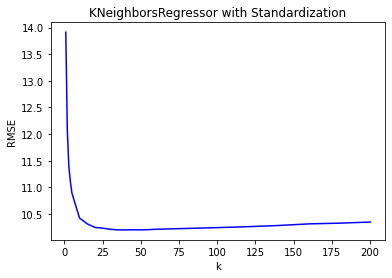

In [26]:
# plot
plt.plot(k_settings, kneireg_stdize_rmse, color='b')
plt.title('KNeighborsRegressor with Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

[Setting 2] KNeighborsRegressor without standardization

In [27]:
# compute rmse under different k
kneireg_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    kneireg = KNeighborsRegressor(n_neighbors=k)
    kneireg.fit(x_train, y_train)
    y_pred = kneireg.predict(x_test)
    kneireg_rmse.append(rmse(y_test, y_pred))
print(kneireg_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[14.923638966418345, 12.777499755429464, 12.075674967716129, 11.767805657810635, 11.466392632384432, 11.07746090040493, 10.888979137947995, 10.797788546734928, 10.79007301797969, 10.75026561256701, 10.717738719772289, 10.714437504678756, 10.698494013475852, 10.69110105960404, 10.682608734124413, 10.672535729098724, 10.662907517124493, 10.67701950452466, 10.683139638996407, 10.687017556442052, 10.691630026202155, 10.69071978380711, 10.698853374700175]


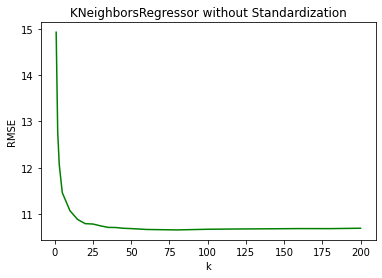

In [29]:
# plot
plt.plot(k_settings, kneireg_rmse, color='g')
plt.title('KNeighborsRegressor without Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

[Setting 3] Myknn_regressor(remove_outliers) with standardization

In [30]:
# compute rmse under different k
myknn_rmse = []
for k in k_settings:
    print(f'Computing k = {k}')
    myknn = myknn_regressor(n_neighbors=k, mean_type='remove_outliers')
    myknn.fit(x_train_stdize, y_train)
    y_pred = myknn.predict(x_test_stdize)
    myknn_rmse.append(rmse(y_test, y_pred))
print(myknn_rmse)

Computing k = 1
Computing k = 2
Computing k = 3
Computing k = 4
Computing k = 5
Computing k = 10
Computing k = 15
Computing k = 20
Computing k = 25
Computing k = 30
Computing k = 35
Computing k = 40
Computing k = 45
Computing k = 50
Computing k = 55
Computing k = 60
Computing k = 80
Computing k = 100
Computing k = 120
Computing k = 140
Computing k = 160
Computing k = 180
Computing k = 200
[13.911074724837043, 12.068170946750795, 11.389120864846157, 11.1123354880961, 10.894692897614565, 10.468549209697088, 10.293424167991525, 10.212572466080376, 10.19147537897133, 10.132105705172414, 10.109608004792985, 10.093231539122922, 10.080018891479627, 10.08078333324933, 10.059767600751963, 10.073857809066583, 10.063683549276588, 10.064917276737452, 10.067237203620246, 10.090646192390137, 10.115316675702928, 10.124987056716318, 10.146220720227745]


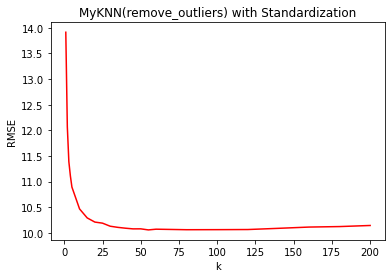

In [32]:
# plot
plt.plot(k_settings, myknn_rmse, color='r')
plt.title('MyKNN(remove_outliers) with Standardization')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

Plot the three curves all together.

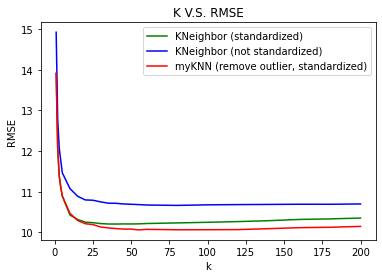

In [33]:
plt.plot(k_settings, kneireg_stdize_rmse, label='KNeighbor (standardized)', color='g')
plt.plot(k_settings, kneireg_rmse, label='KNeighbor (not standardized)', color='b')
plt.plot(k_settings, myknn_rmse, label='myKNN (remove outlier, standardized)', color='r')
plt.title('K V.S. RMSE')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Discussion
From the figure above, we can see that the only setting without standardizing feature values (the second setting) results in larger RMSE. Moreover, removing outliers seems to be effective in minimizing RMSE when dealing with standardized data in this dataset.

## Question 3
### Q3.1 Coordinate Descent with Soft Thresholding Formula

minimize $L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]$

First, we consider $w_0$.

$$
\begin{align}
\frac{\partial L}{\partial w_0}
&= \frac{-1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0) \\
&= \frac{-1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) + w_0 \\
&= 0 \\
w_0 &= \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)
\end{align}
$$


Then, consider $w_j$, where $j=1,2,...,M$.

$$
\begin{align}
\frac{\partial L}{\partial w_j}
&= \frac{1}{n} \sum_{i=1}^n(y_i - \mathbf{w}^T \mathbf{x}_i - w_0)(-x_{i, j}) + \lambda sgn(w_j) \\
&= \frac{1}{n} \sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_{j} x_{i,j} - w_0)(-x_{i, j}) + \lambda sgn(w_j) \\
&= \frac{1}{n} \sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)(-x_{i, j}) + \frac{w_j}{n}\sum_{i=1}^n x_{i,j}^2 + \lambda sgn(w_j) \\
&= 0
\end{align}
$$

$$
\begin{align}
w_j
&= \frac{n[\frac{-1}{n} \sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)(-x_{i, j}) - \lambda sgn(w_j)]}{\sum_{i=1}^n x_{i,j}^2} \\
&= \frac{\sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)x_{i, j} - n \lambda sgn(w_j)}{\sum_{i=1}^n x_{i,j}^2} \\
&=
    \begin{cases}
    \frac{\sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)x_{i, j} - n \lambda}{\sum_{i=1}^n x_{i,j}^2} &&\text{if } \frac{\sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)x_{i, j} - n \lambda}{\sum_{i=1}^n x_{i,j}^2} > 0 \\
    \frac{\sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)x_{i, j} + n \lambda}{\sum_{i=1}^n x_{i,j}^2} &&\text{if } \frac{\sum_{i=1}^n(y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i,-j} - w_0)x_{i, j} + n \lambda}{\sum_{i=1}^n x_{i,j}^2} < 0 \\
    0 &&\text{otherwise}
    \end{cases}
\end{align}
$$

### Q3.2 MyLasso Implementation

Before implementing `mylasso`, first calculate $\mathbf w$ when regularizing the bias term.

When we regularize the bias term, the loss function becomes $L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [|w_0| + \sum_{j=1}^{M} |w_j|]$.

$w_j, j=1,2,...,M$, stays the same as we calculated in Q3.1. However, $w_0$ becomes the follows.

$$
\begin{align}
\frac{\partial L}{\partial w_0}
&= \frac{-1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0) + \lambda sgn(w_0) \\
&= \frac{-1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) + w_0 + \lambda sgn(w_0) \\
&= 0
\end{align}
$$

$$
\begin{align}
w_0
&= \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) - \lambda sgn(w_0) \\
&=
\begin{cases}
\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) - \lambda &&\text{if }\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) - \lambda > 0 \\
\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) + \lambda &&\text{if }\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i) + \lambda < 0 \\
0 &&\text{otherwise}
\end{cases}
\end{align}
$$

Note that $x_{i, 0}=1$ for all $i=1,2,...,n$. Therefore $\sum_{i=1}^n x_{i,0}^2=n$.

The resulting $w_0$ fits the closed form of $w_j$ we calculated in Q3.1.

In [237]:
import numpy as np

class mylasso():
    
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """
        lamcoef: the regularization coefficient
        max_iter: maximum number of iteration for model training
        tol: tolerance for the stopping criteria for model training
        const_regu: whether the constant term should be regularized, default to False
        """
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """
        Fit a Lasso model
        x_train: a numpy matrix that contains training features
        y_train: a numpy matrix that contains the label
        winit: how weights are initialized, default to "ridge", ridge regression
        keep_traindata: whether the object is going to keep training data after the training process completed
        verbose: output a lot of message
        """
        
        # keep training data, add a column of all 1s
        if keep_traindata:
            self.x_train = x_train.copy()
            self.y_train = y_train.copy()
        x_train, y_train = x_train.copy(), y_train.copy()
        n_data = x_train.shape[0]
        ones_col = np.ones((n_data, 1))
        x_train = np.hstack((ones_col, x_train))
        n_feature = x_train.shape[1]
        
        # w init
        w = np.zeros_like(x_train[0])
        if winit == 'ridge':
            inverse_term = self.lamcoef * np.eye(n_feature) + np.matmul(x_train.T, x_train)
            w = np.matmul(np.linalg.inv(inverse_term), np.matmul(x_train.T, y_train))
        
        # train with Lasso regression
        prev_loss = self._loss(x_train, y_train, w, const_regu=self.const_regu)
        if verbose:
            print(f'init loss: {prev_loss}')
            
        for iteration in range(self.max_iter):
            
            # update w_j
            for j in range(n_feature):
                if j == 0 and not self.const_regu:
                    w[j] = np.mean(y_train - np.matmul(np.delete(x_train, j, axis=1), np.delete(w, j, axis=0).T))
                else:
                    err = y_train - np.matmul(np.delete(x_train, j, axis=1), np.delete(w, j, axis=0).T)
                    sum_term = np.sum(err * x_train[:, j])
                    nlam = n_data * self.lamcoef
                    x_ijsq = np.sum(x_train[:, j] ** 2)
                    if ((sum_term - nlam)/x_ijsq > 0):
                        w[j] = (sum_term - nlam) / x_ijsq
                    elif ((sum_term + nlam)/x_ijsq < 0):
                        w[j] = (sum_term + nlam) / x_ijsq
                    else:
                        w[j] = 0
            
            # break if L differs by smaller than tol
            cur_loss = self._loss(x_train, y_train, w, const_regu=self.const_regu)
            if verbose:
                print(f'[iteration {iteration}] loss: {cur_loss}')
            if prev_loss - cur_loss < self.tol:
                if verbose:
                    print(f'loss differ by {prev_loss - cur_loss} < {self.tol}, breaking...')
                break
            prev_loss = cur_loss
        
        return w, cur_loss

    def predict(self, x_test):
        """Make prediction using trained model"""
    
    def _loss(self, x_train, y_train, w, const_regu):
        mse = np.mean((y_train - np.matmul(x_train, w.T)) ** 2)
        w_l1norm = np.linalg.norm(w, ord=1) if const_regu else np.linalg.norm(w[1:], ord=1)
        return (mse/2 + self.lamcoef*w_l1norm)
        

### Q3.3 Training with Lasso Regression

First, load and standardize the training data.

In [259]:
import pickle
from sklearn import preprocessing

np.set_printoptions(suppress=True)

with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)
xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
x_train_sd = xscaler.transform(msd_data['X_train'])
x_test_sd = xscaler.transform(msd_data['X_test'])
y_train = msd_data['Y_train']
y_test = msd_data['Y_test']

Then, fit `mylasso` with the training data.

In [261]:
mlo = mylasso(lamcoef = 0.1)
w, loss_train = mlo.fit(x_train_sd, y_train)

List training loss, RMSE, MAE, intercept, feature weight, and the number of nonzero feature weight.

In [262]:
x_train_sd_aug = np.hstack((np.ones((y_train.shape[0], 1)), x_train_sd))
y_pred = np.matmul(x_train_sd_aug, w.T)
mse = np.mean((y_pred - y_train) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.absolute(y_pred - y_train))
print(f'Training loss = {loss_train}')
print(f'RMSE in training data = {rmse}')
print(f'MAE in training data = {mae}')
print(f'Intercept = {w[0]}')
print(f'Feature weight (without bias) = {w[1:]}')
print(f'{np.count_nonzero(w[1:])} nonzero feature weights')

Training loss = 49.888404109953676
RMSE in training data = 9.71949908908463
MAE in training data = 6.980898009625434
Intercept = 1998.266
Feature weight (without bias) = [ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.0122